In [33]:
# import data.
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import numpy as np
import re
df= pd.read_csv('/Users/anishumesh/food_reviews.csv',header=0, encoding='latin1')
df['review'] = df['text']
# create new colums for each season if months match conditions.
df['winter'] = df['review_date'].apply(lambda x : 'winter' if re.findall(r'^\d*', x)[0] in ['12','1','2'] else np.nan)
df['summer'] = df['review_date'].apply(lambda x : 'summer' if re.findall(r'^\d*', x)[0] in ['6','7','8'] else np.nan)
df['fall'] = df['review_date'].apply(lambda x : 'fall' if re.findall(r'^\d*', x)[0] in ['9','10','11'] else np.nan)
df['spring'] = df['review_date'].apply(lambda x : 'spring' if re.findall(r'^\d*', x)[0] in ['3','4','5'] else np.nan)

# Topics Classification.


In [34]:
from sklearn.metrics import roc_curve, auc,precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
import seaborn as sns
import numpy as np

# Topic Classification without Gridsearch

## Multinomial Naive Bayes

In [35]:
# define a function to evaluate NB model.
def NB_topic_classification(train_file_name):
    # import dataset.
    categ_data = pd.read_csv(train_file_name , header = 0)    
    classes = categ_data.label.values
    classes = [i.split(",") for i in classes]
    # one hot encoding
    mlb = MultiLabelBinarizer()
    Y = mlb.fit_transform(classes)
    
    # split dataset into traning and testing.
    X_train, X_test, Y_train, Y_test = train_test_split(\
                    categ_data.review, Y, test_size=0.3, random_state=0)
    
    # create a pipeline to vectorize and classify.
    classifier = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words="english",\
                                  min_df=2)),
        ('clf', OneVsRestClassifier(MultinomialNB(alpha = 0.5 )))])
    
    # train model with training part of the datastet.
    classifier.fit(X_train, Y_train)
    
    # predict testing data and store them
    predicted = classifier.predict(X_test)

    predicted.shape
    # compare predicted with the ground truth and report performance.
    print(classification_report\
          (Y_test, predicted, target_names=mlb.classes_))

In [11]:
NB_topic_classification("label restaurant data.csv" )

precision    recall  f1-score   support

               ambience       0.95      0.29      0.44       140
anecdotes/miscellaneous       0.74      0.56      0.64       342
                   food       0.83      0.72      0.77       366
                  price       0.93      0.36      0.52       102
                service       0.86      0.50      0.64       173

              micro avg       0.82      0.55      0.66      1123
              macro avg       0.86      0.49      0.60      1123
           weighted avg       0.83      0.55      0.65      1123
            samples avg       0.62      0.58      0.59      1123

/Users/anishumesh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


## Support Vector Machine

In [36]:
# This function is to evaluate SVM model.
# The code is referenced from the NB model eveluation above;
# however, the model has changed to SVM in the pipeline definition.

def SVM_topic_classification(train_file_name):
    
    categ_data = pd.read_csv(train_file_name , header = 0)    
    classes = categ_data.label.values
    classes = [i.split(",") for i in classes]

    mlb = MultiLabelBinarizer()
    Y = mlb.fit_transform(classes)

    X_train, X_test, Y_train, Y_test = train_test_split(\
                    categ_data.review, Y, test_size=0.3, random_state=0)

    classifier = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words="english",\
                                  min_df=2)),
        ('clf', OneVsRestClassifier(LinearSVC(C = 1)))])

    classifier.fit(X_train, Y_train)

    predicted = classifier.predict(X_test)

    predicted.shape
    
    print(classification_report\
          (Y_test, predicted, target_names=mlb.classes_))

In [13]:
SVM_topic_classification("label restaurant data.csv")

precision    recall  f1-score   support

               ambience       0.87      0.54      0.66       140
anecdotes/miscellaneous       0.71      0.73      0.72       342
                   food       0.85      0.80      0.82       366
                  price       0.88      0.74      0.80       102
                service       0.85      0.70      0.77       173

              micro avg       0.80      0.73      0.76      1123
              macro avg       0.83      0.70      0.76      1123
           weighted avg       0.81      0.73      0.76      1123
            samples avg       0.74      0.73      0.72      1123

/Users/anishumesh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


## K-nearest neighbour

In [37]:
# This function is to evaluate KNN model.
# The code is referenced from the NB model eveluation above;
# however, the model has changed to KNN in the pipeline definition.


def KNN_topic_classification(train_file_name):
    
    categ_data = pd.read_csv(train_file_name , header = 0)    
    classes = categ_data.label.values
    classes = [i.split(",") for i in classes]

    mlb = MultiLabelBinarizer()
    Y = mlb.fit_transform(classes)

    X_train, X_test, Y_train, Y_test = train_test_split(\
                    categ_data.review, Y, test_size=0.3, random_state=0)

    classifier = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words="english",\
                                  min_df=2)),
        ('clf', OneVsRestClassifier(KNeighborsClassifier(n_neighbors=1)))])

    classifier.fit(X_train, Y_train)

    predicted = classifier.predict(X_test)

    predicted.shape
    
    print(classification_report\
          (Y_test, predicted, target_names=mlb.classes_))  


In [15]:
KNN_topic_classification("label restaurant data.csv" )

precision    recall  f1-score   support

               ambience       0.67      0.11      0.20       140
anecdotes/miscellaneous       0.42      0.87      0.57       342
                   food       0.73      0.25      0.37       366
                  price       0.75      0.29      0.42       102
                service       0.56      0.23      0.33       173

              micro avg       0.49      0.42      0.46      1123
              macro avg       0.63      0.35      0.38      1123
           weighted avg       0.60      0.42      0.41      1123
            samples avg       0.49      0.46      0.46      1123



# Topic Classification with Gridsearch

In [38]:
categ_data = pd.read_csv("label restaurant data.csv" , header = 0)   
categ_data.head()
classes = categ_data.label.values
classes = [i.split(",") for i in classes]


In [39]:
# implement one hot encoding.
mlb = MultiLabelBinarizer()
Y=mlb.fit_transform(classes)

classes_label = mlb.classes_


ambience = Y[:,0]
food = Y[:,2]
miscellaneous = Y[:,1]
service = Y[:,4]
price = Y[:,3]


## Topic Classification using Multinomial Naive Bayes.

In [40]:

def NB_topic_classification(review_data, feature):
    

    X_train, X_test, y_train, y_test = train_test_split(review_data, feature , \
                                                        test_size=0.25, random_state=0)

    text_clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

    parameters = {'tfidf__min_df':[1, 2, 3],
                  'tfidf__max_df': [0.995 , 0.999, 1.0],
                  'tfidf__stop_words':[None,"english"],
                  'clf__alpha': [0.5, 1.0, 2.0 , 5.0]}

    metric =  "f1_macro"

    gs_clf = GridSearchCV(text_clf, param_grid=parameters, scoring=metric, cv=5)


    gs_clf = gs_clf.fit(X_train, y_train)

    for param_name in gs_clf.best_params_:
        print("{} : {}".format(param_name , gs_clf.best_params_[param_name]))
    print("best f1 score:", gs_clf.best_score_)

    clf_alpha = gs_clf.best_params_["clf__alpha"]
    tfidf_min_df = gs_clf.best_params_["tfidf__min_df"]
    tfidf_max_df = gs_clf.best_params_["tfidf__max_df"]
    tfidf_stop_words = gs_clf.best_params_["tfidf__stop_words"]

    classifier = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words=tfidf_stop_words,\
                                  min_df=tfidf_min_df, max_df = tfidf_max_df)),
        ('clf', MultinomialNB(alpha = clf_alpha ))])

    clf = classifier.fit(X_train,  y_train)

    labels=sorted(np.unique(feature))
    labels = list(map(str, labels))

    predicted = classifier.predict(X_test)
    
    return predicted



In [20]:
predicted_ambience =  NB_topic_classification(categ_data.review, ambience)
predicted_miscellaneous=  NB_topic_classification(categ_data.review, miscellaneous)
predicted_food =  NB_topic_classification(categ_data.review, food)
predicted_price =  NB_topic_classification(categ_data.review, price)
predicted_service =  NB_topic_classification(categ_data.review, service)

ification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/anishumesh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/anishumesh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/anishumesh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/anishumesh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classificatio

In [41]:
X_train, X_test, y_train, y_test = train_test_split(categ_data.review, Y , \
                                                    test_size=0.25, random_state=0)

zip_all = list(zip(predicted_ambience, predicted_miscellaneous, predicted_food, predicted_price, predicted_service))

print(classification_report\
      (y_test, np.array(list(zip_all)), target_names=mlb.classes_))

precision    recall  f1-score   support

               ambience       0.95      0.30      0.45       121
anecdotes/miscellaneous       0.78      0.56      0.65       289
                   food       0.86      0.70      0.77       301
                  price       0.97      0.41      0.58        80
                service       0.88      0.56      0.68       145

              micro avg       0.85      0.56      0.67       936
              macro avg       0.89      0.50      0.63       936
           weighted avg       0.86      0.56      0.66       936
            samples avg       0.62      0.59      0.60       936

/Users/anishumesh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


## Topic Classification using Support Vector Machine

In [42]:

def SVM_topic_classification(review_data, feature):
    

    X_train, X_test, y_train, y_test = train_test_split(review_data, feature , \
                                                        test_size=0.25, random_state=0)

    text_clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', svm.SVC())])

    parameters = {'tfidf__min_df':[1, 2, 3],
                  'tfidf__max_df': [0.995 , 0.999 , 1.0],
                  'tfidf__stop_words':[None,"english"],
                  'clf__C':[ 1, 2, 5],
                 'clf__kernel':['linear']}

    metric =  "f1_macro"

    gs_clf = GridSearchCV(text_clf, param_grid=parameters, scoring=metric, cv=5)


    gs_clf = gs_clf.fit(X_train, y_train)

    for param_name in gs_clf.best_params_:
        print("{} : {}".format(param_name , gs_clf.best_params_[param_name]))
    print("best f1 score:", gs_clf.best_score_)

    clf_C = gs_clf.best_params_["clf__C"]
    clf_kernel = gs_clf.best_params_["clf__kernel"]
    tfidf_min_df = gs_clf.best_params_["tfidf__min_df"]
    tfidf_max_df = gs_clf.best_params_["tfidf__max_df"]
    tfidf_stop_words = gs_clf.best_params_["tfidf__stop_words"]

    classifier = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words=tfidf_stop_words,\
                                  min_df=tfidf_min_df, max_df = tfidf_max_df)),
        ('clf', svm.SVC(C = clf_C, kernel = clf_kernel))])

    clf = classifier.fit(X_train,  y_train)

    labels=sorted(np.unique(feature))
    labels = list(map(str, labels))

    predicted = classifier.predict(X_test)
    
    return predicted


In [58]:
predicted_ambience =  SVM_topic_classification(categ_data.review, ambience)
predicted_miscellaneous=  SVM_topic_classification(categ_data.review, miscellaneous)
predicted_food =  SVM_topic_classification(categ_data.review, food)
predicted_price =  SVM_topic_classification(categ_data.review, price)
predicted_service =  SVM_topic_classification(categ_data.review, service)

clf__C : 2
clf__kernel : linear
tfidf__max_df : 0.995
tfidf__min_df : 1
tfidf__stop_words : english
best f1 score: 0.8115904458156638
clf__C : 1
clf__kernel : linear
tfidf__max_df : 0.995
tfidf__min_df : 1
tfidf__stop_words : None
best f1 score: 0.7991135102581619
clf__C : 1
clf__kernel : linear
tfidf__max_df : 0.995
tfidf__min_df : 1
tfidf__stop_words : None
best f1 score: 0.8666034900184318
clf__C : 2
clf__kernel : linear
tfidf__max_df : 0.995
tfidf__min_df : 1
tfidf__stop_words : english
best f1 score: 0.8534716551437846
clf__C : 2
clf__kernel : linear
tfidf__max_df : 0.995
tfidf__min_df : 1
tfidf__stop_words : english
best f1 score: 0.8787895157563381


In [43]:
X_train, X_test, y_train, y_test = train_test_split(categ_data.review, Y , \
                                                    test_size=0.25, random_state=0)

zip_all = list(zip(predicted_ambience, predicted_miscellaneous, predicted_food, predicted_price, predicted_service))

print(classification_report\
      (y_test, np.array(list(zip_all)), target_names=mlb.classes_))

precision    recall  f1-score   support

               ambience       0.95      0.30      0.45       121
anecdotes/miscellaneous       0.78      0.56      0.65       289
                   food       0.86      0.70      0.77       301
                  price       0.97      0.41      0.58        80
                service       0.88      0.56      0.68       145

              micro avg       0.85      0.56      0.67       936
              macro avg       0.89      0.50      0.63       936
           weighted avg       0.86      0.56      0.66       936
            samples avg       0.62      0.59      0.60       936



## Topic Classification using K-Nearest Neighbour

In [44]:

def KNN_topic_classification(review_data, feature):
    

    X_train, X_test, y_train, y_test = train_test_split(review_data, feature , \
                                                        test_size=0.25, random_state=0)

    text_clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', KNeighborsClassifier())])
    
    k_range = list(range(1, 10))

    parameters = {'tfidf__min_df':[1, 2, 3],
                  'tfidf__stop_words':[None,"english"],
                  'clf__n_neighbors': k_range}

    metric =  "f1_macro"

    gs_clf = GridSearchCV(text_clf, param_grid=parameters, scoring=metric, cv=5)


    gs_clf = gs_clf.fit(X_train, y_train)

    for param_name in gs_clf.best_params_:
        print("{} : {}".format(param_name , gs_clf.best_params_[param_name]))
    print("best f1 score:", gs_clf.best_score_)

    clf_k = gs_clf.best_params_["clf__n_neighbors"]
    tfidf_min_df = gs_clf.best_params_["tfidf__min_df"]
    tfidf_stop_words = gs_clf.best_params_["tfidf__stop_words"]

    classifier = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words=tfidf_stop_words,\
                                  min_df=tfidf_min_df)),
        ('clf', KNeighborsClassifier(n_neighbors= clf_k))])

    clf = classifier.fit(X_train,  y_train)

    labels=sorted(np.unique(feature))
    labels = list(map(str, labels))

    predicted = classifier.predict(X_test)
    
    return predicted

In [263]:
predicted_ambience =  KNN_topic_classification(categ_data.review, ambience)
predicted_miscellaneous= KNN_topic_classification(categ_data.review, miscellaneous)
predicted_food =  KNN_topic_classification(categ_data.review, food)
predicted_price =  KNN_topic_classification(categ_data.review, price)
predicted_service =  KNN_topic_classification(categ_data.review, service)

cation.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/anishumesh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/anishumesh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/anishumesh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/anishumesh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.p

In [45]:
X_train, X_test, y_train, y_test = train_test_split(categ_data.review, Y , \
                                                    test_size=0.25, random_state=0)

zip_all = list(zip(predicted_ambience, predicted_miscellaneous, predicted_food, predicted_price, predicted_service))

print(classification_report\
      (y_test, np.array(list(zip_all)), target_names=mlb.classes_))

precision    recall  f1-score   support

               ambience       0.95      0.30      0.45       121
anecdotes/miscellaneous       0.78      0.56      0.65       289
                   food       0.86      0.70      0.77       301
                  price       0.97      0.41      0.58        80
                service       0.88      0.56      0.68       145

              micro avg       0.85      0.56      0.67       936
              macro avg       0.89      0.50      0.63       936
           weighted avg       0.86      0.56      0.66       936
            samples avg       0.62      0.59      0.60       936



## Feature classification using SVM (Best Performance)

In [46]:
All_review_to_classify = pd.read_csv("/Users/anishumesh/food_reviews.csv")
All_review_to_classify['review'] = All_review_to_classify['text']
All_review_to_classify = All_review_to_classify.review

def feature_classification(reviews):
    text_clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', svm.SVC())])

    labels=sorted(np.unique(ambience))
    labels = list(map(str, labels))


    ambience_classifier = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words= "english", min_df=1, max_df = 0.995)),
        ('clf', svm.SVC(C = 2, kernel = 'linear'))])

    ambience_clf = ambience_classifier.fit(categ_data.review, ambience)

    ambience_predicted = ambience_classifier.predict(reviews)


    miscel_classifier = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words= None, min_df=1, max_df = 0.995)),
        ('clf', svm.SVC(C = 1, kernel = 'linear'))])

    miscel_clf = miscel_classifier.fit(categ_data.review, miscellaneous)

    miscel_predicted = miscel_classifier.predict(reviews)


    food_classifier = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words= None, min_df=1, max_df = 0.995)),
        ('clf', svm.SVC(C = 1, kernel = 'linear'))])

    food_clf = food_classifier.fit(categ_data.review, food)

    food_predicted = food_classifier.predict(reviews)


    price_classifier = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words= "english", min_df=1, max_df = 0.995)),
        ('clf', svm.SVC(C = 2, kernel = 'linear'))])

    price_clf = price_classifier.fit(categ_data.review, price)

    price_predicted = price_classifier.predict(reviews)


    service_classifier = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words= "english", min_df=1, max_df = 0.995)),
        ('clf', svm.SVC(C = 2, kernel = 'linear'))])

    service_clf = service_classifier.fit(categ_data.review, service)

    service_predicted = service_classifier.predict(reviews)
    
    combined_classes = np.array(list(zip(ambience_predicted, miscel_predicted, \
                                     food_predicted, price_predicted, service_predicted)))
    return combined_classes



(-1.1861625405042877,
 1.1041029995557592,
 -1.0648191950982024,
 1.1631035656679731)

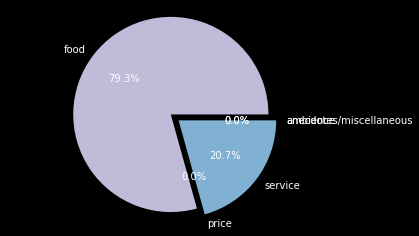

In [28]:
combined_classes = feature_classification(All_review_to_classify)

count_classes = np.sum(combined_classes , axis=0)


fig1, ax1 = plt.subplots()
ax1.pie(count_classes, explode= (0, 0, 0.1, 0 , 0) , labels = mlb.classes_ ,autopct='%1.1f%%')
ax1.axis('equal')


In [29]:
combined_classes

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1],
       [0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0]])

In [48]:
classify

,Ambience,Miscelleneous,Food,Price,Service
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,1,0,0
5,0,0,1,0,0
6,0,0,1,0,0
7,0,0,1,0,0
8,0,0,1,0,0
9,0,0,1,0,0


In [47]:

classify = pd.DataFrame(list(map(np.ravel, combined_classes)))
classify.columns = ['Ambience', 'Miscelleneous', 'Food', 'Price', 'Service']
classify
All_Reviews = pd.DataFrame(All_review_to_classify)
Final_Reviews = All_Reviews.join(classify)
Final_Reviews['Food Mentioned'] = df['menu_item']
Final_Reviews['Rating'] = df['review_rating']
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
sentiment = Final_Reviews['review'].apply(lambda x: analyser.polarity_scores(x))
Final_Reviews = pd.concat([Final_Reviews,sentiment.apply(pd.Series)],1)
Final_Reviews

,review,Ambience,Miscelleneous,Food,Price,Service,Food Mentioned,Rating,neg,neu,pos,compound
0,I always order the most basic burger whenever ...,0,0,1,0,0,"The Greek Burger,The Mexican Burger,Parmesan T...",5.0,0.019,0.709,0.271,0.9847
1,After my second time here I can truly say I r...,0,0,1,0,0,"Mussels and Clams,Cavatelli alla Norcina,Musse...",5.0,0.019,0.668,0.312,0.9994
2,First of all their minimum for delivery is on...,0,0,0,0,1,"Tea,Fries,Fries,Fries,Cilantro Lime Salad,Frie...",5.0,0.000,0.836,0.164,0.9827
3,Was not disappointed once I was in range and c...,0,0,1,0,0,"Dinner Plate,Wings,Wings,Brunch Special,Wings,...",5.0,0.056,0.771,0.173,0.9352
4,Had Croque Monsieur it can come in ham turke...,0,0,1,0,0,"30 Crepe Xpress,French Onion Soup,Water,15 Cro...",5.0,0.023,0.851,0.126,0.9072
5,Delish I used to love this cute French crepes...,0,0,1,0,0,"La Colombienne,La Larzac,La Scandinave,La Bres...",4.0,0.027,0.764,0.209,0.9867
6,"Had to ""do the dirty"" while in SoCal I'm veg...",0,0,1,0,0,"The Dirty Corn,The Green Dog,The Green Dog,The...",4.0,0.082,0.693,0.225,0.9401
7,I finally got to try this sandwich shop They ...,0,0,1,0,0,"Cannoli,Macaroni Salad,Cannoli,Cannoli,Chicken...",3.0,0.029,0.764,0.207,0.9800
8,My favorite tacos ever Everyone I take here I...,0,0,1,0,0,"Steak Picado,Chicarron,Mole Poblano,Quesadilla...",5.0,0.000,0.800,0.200,0.9833
9,After a fulfilling day at the LA Flower Distri...,0,0,1,0,0,"Chorizo,Quesadilla,Steak Picado,Quesadilla,Hor...",5.0,0.035,0.790,0.175,0.9855


In [31]:
filter = (Final_Reviews['Ambience'] + Final_Reviews['Miscelleneous'] + Final_Reviews['Food'] + Final_Reviews['Price'] + Final_Reviews['Service'] + Final_Reviews['Rating'] + Final_Reviews['compound'] >= 7.5) & (Final_Reviews['Rating']>4)
Final_Reviews.loc[filter,"Revisit Intention"] = 'Definitely'

filter = ((Final_Reviews['Ambience'] + Final_Reviews['Miscelleneous'] + Final_Reviews['Food'] + Final_Reviews['Price'] + Final_Reviews['Service'] + Final_Reviews['Rating'] + Final_Reviews['compound'] >= 6.5 )& (Final_Reviews['Ambience'] + Final_Reviews['Miscelleneous'] + Final_Reviews['Food'] + Final_Reviews['Price'] + Final_Reviews['Service'] + Final_Reviews['Rating'] + Final_Reviews['compound']<7.5)) & (Final_Reviews['Rating']>4)
Final_Reviews.loc[filter,"Revisit Intention"] = 'Probably'

filter = ((Final_Reviews['Ambience'] + Final_Reviews['Miscelleneous'] + Final_Reviews['Food'] + Final_Reviews['Price'] + Final_Reviews['Service'] + Final_Reviews['Rating'] + Final_Reviews['compound'] >= 4.5 )& (Final_Reviews['Ambience'] + Final_Reviews['Miscelleneous'] + Final_Reviews['Food'] + Final_Reviews['Price'] + Final_Reviews['Service'] + Final_Reviews['Rating'] + Final_Reviews['compound']<6.5)) & (Final_Reviews['Rating']>=3)
Final_Reviews.loc[filter,"Revisit Intention"] = 'May or May Not'

filter = ((Final_Reviews['Ambience'] + Final_Reviews['Miscelleneous'] + Final_Reviews['Food'] + Final_Reviews['Price'] + Final_Reviews['Service'] + Final_Reviews['Rating'] + Final_Reviews['compound'] >= 3.5 )& (Final_Reviews['Ambience'] + Final_Reviews['Miscelleneous'] + Final_Reviews['Food'] + Final_Reviews['Price'] + Final_Reviews['Service'] + Final_Reviews['Rating'] + Final_Reviews['compound']<4.5)) & (Final_Reviews['Rating']>=3)
Final_Reviews.loc[filter,"Revisit Intention"] = 'Probably Not'

filter = ((Final_Reviews['Ambience'] + Final_Reviews['Miscelleneous'] + Final_Reviews['Food'] + Final_Reviews['Price'] + Final_Reviews['Service'] + Final_Reviews['Rating'] + Final_Reviews['compound']<3.5)) & (Final_Reviews['Rating']<3)
Final_Reviews.loc[filter,"Revisit Intention"] = 'Definitely Not'
Final_Reviews

,review,Ambience,Miscelleneous,Food,Price,Service,Food Mentioned,Rating,neg,neu,pos,compound,Revisit Intention
0,I always order the most basic burger whenever ...,0,0,1,0,0,"The Greek Burger,The Mexican Burger,Parmesan T...",5.0,0.019,0.709,0.271,0.9847,Probably
1,After my second time here I can truly say I r...,0,0,1,0,0,"Mussels and Clams,Cavatelli alla Norcina,Musse...",5.0,0.019,0.668,0.312,0.9994,Probably
2,First of all their minimum for delivery is on...,0,0,0,0,1,"Tea,Fries,Fries,Fries,Cilantro Lime Salad,Frie...",5.0,0.000,0.836,0.164,0.9827,Probably
3,Was not disappointed once I was in range and c...,0,0,1,0,0,"Dinner Plate,Wings,Wings,Brunch Special,Wings,...",5.0,0.056,0.771,0.173,0.9352,Probably
4,Had Croque Monsieur it can come in ham turke...,0,0,1,0,0,"30 Crepe Xpress,French Onion Soup,Water,15 Cro...",5.0,0.023,0.851,0.126,0.9072,Probably
5,Delish I used to love this cute French crepes...,0,0,1,0,0,"La Colombienne,La Larzac,La Scandinave,La Bres...",4.0,0.027,0.764,0.209,0.9867,May or May Not
6,"Had to ""do the dirty"" while in SoCal I'm veg...",0,0,1,0,0,"The Dirty Corn,The Green Dog,The Green Dog,The...",4.0,0.082,0.693,0.225,0.9401,May or May Not
7,I finally got to try this sandwich shop They ...,0,0,1,0,0,"Cannoli,Macaroni Salad,Cannoli,Cannoli,Chicken...",3.0,0.029,0.764,0.207,0.9800,May or May Not
8,My favorite tacos ever Everyone I take here I...,0,0,1,0,0,"Steak Picado,Chicarron,Mole Poblano,Quesadilla...",5.0,0.000,0.800,0.200,0.9833,Probably
9,After a fulfilling day at the LA Flower Distri...,0,0,1,0,0,"Chorizo,Quesadilla,Steak Picado,Quesadilla,Hor...",5.0,0.035,0.790,0.175,0.9855,Probably


In [32]:
Final_Reviews.review[15]

"The Food  The food here is very good  The pastrami literally breaks into a billion pieces as soon as you put it in your mouth  The flavor is so subtle and juicy  it literally melts  I got the number 19  which is the pastrami sandwich with cole slaw and Swiss cheese on rye bread  I got two Latkas with cream and apple sauce  and the pastrami chili cheese fries  The sand which was awesome  the cole slaw was amazing  Creamy cold and crunchy  perfectly complimenting the flavors  The latkas were deep fried to perfection  And the chili cheese fries were huge  Like super huge  Had to take left over home The location  it's located in the center of west la  on Wiltshire  Traffic and parking can be a little tough but they have their own parking area wth validation  The restaurant is clean and nice The Service  as we walked in we were asked how big our party was  I was with my mom so just two  I was afraid it would take forever to get seated because the place was packed  But after a few minutes w